In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Dogecoin

In [2]:
doge = pd.read_csv('../data/DOGE-USD.csv')

In [3]:
doge['Date'] = pd.to_datetime(doge['Date'])

doge = doge[['Date', 'Close']]

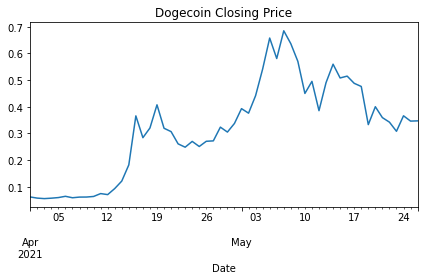

In [224]:
doge[doge.Date >= '04-01-2021'].set_index('Date')['Close'].plot()
plt.title('Dogecoin Closing Price')
plt.tight_layout()
plt.savefig('../images/doge/doge_01.png', dpi = 150);

In [10]:
doge['rolling_7_day_average'] = doge.rolling('7d', on = 'Date')['Close'].mean()

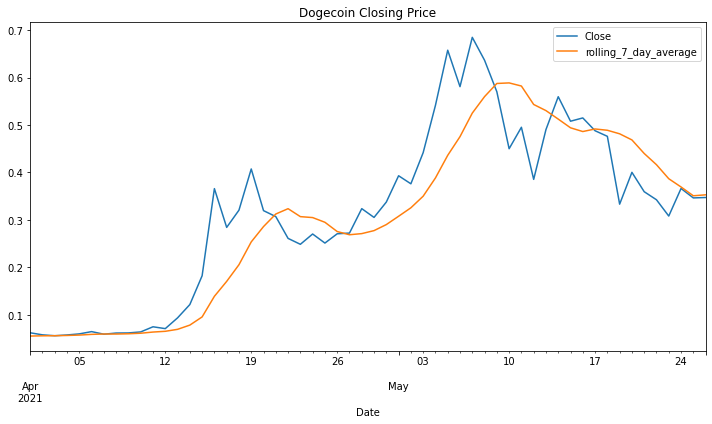

In [16]:
fig, ax = plt.subplots(figsize = (10,6))

doge[doge.Date >= '04-01-2021'].set_index('Date')[['Close', 'rolling_7_day_average']].plot(ax = ax)
plt.title('Dogecoin Closing Price')
plt.tight_layout()
plt.savefig('../images/doge/doge_02.png', dpi = 150);

### Davidson County Crashes Data

In [7]:
traffic = pd.read_csv('../data/Traffic_Accidents.csv')

In [10]:
traffic['Date and Time'] = pd.to_datetime(traffic['Date and Time'])

traffic['date'] = traffic['Date and Time'].dt.date

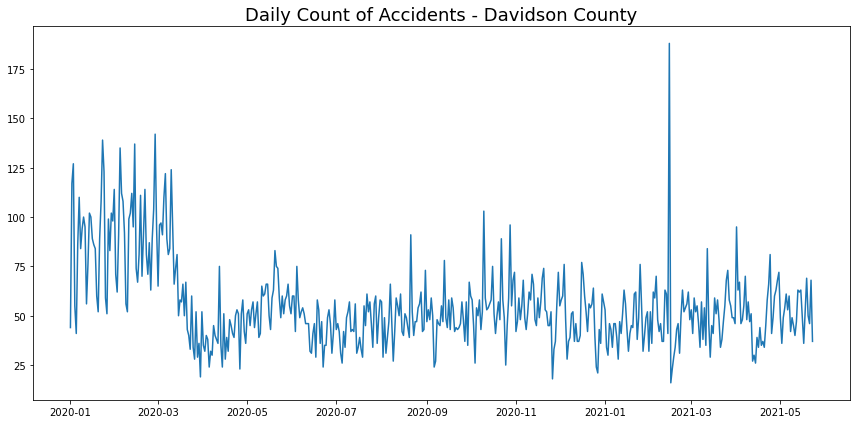

In [11]:
plt.figure(figsize = (12,6))
traffic.date.value_counts().sort_index().plot()
plt.title('Daily Count of Accidents - Davidson County', fontsize = 18)

plt.tight_layout()
plt.savefig('../images/crashes/dc_crashes01.png', dpi = 150);

In [12]:
traffic = traffic.sort_values('Date and Time')

traffic['total_crashes_30_days'] = traffic.rolling('30d', on = 'Date and Time')['Accident Number'].count()

traffic['rolling_daily_average'] = traffic['total_crashes_30_days'] / 30

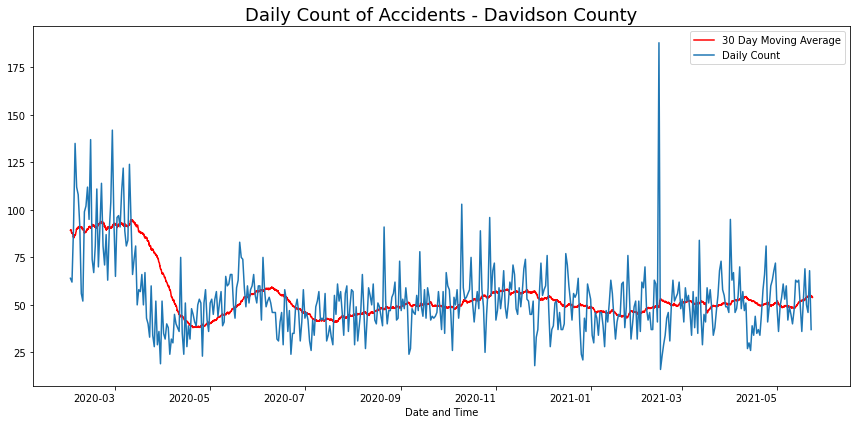

In [13]:
plt.figure(figsize = (12,6))
traffic[traffic['Date and Time'] > '02/01/2020'].set_index('Date and Time')['rolling_daily_average'].plot(color = 'red', label = '30 Day Moving Average')
traffic[traffic['Date and Time'] > '02/01/2020'].date.value_counts().sort_index().plot(label = 'Daily Count')
plt.title('Daily Count of Accidents - Davidson County', fontsize = 18)
plt.legend()
plt.tight_layout()
plt.savefig('../images/crashes/dc_crashes02.png', dpi = 150);

In [14]:
traffic_by_precinct = (traffic
                       .groupby('Precinct')
                       .rolling('30d', on = 'Date and Time')['Accident Number']
                       .count()
                       .reset_index()
                       .set_index('Date and Time')
                      )
traffic_by_precinct['rolling_daily_average'] = traffic_by_precinct['Accident Number'] / 30

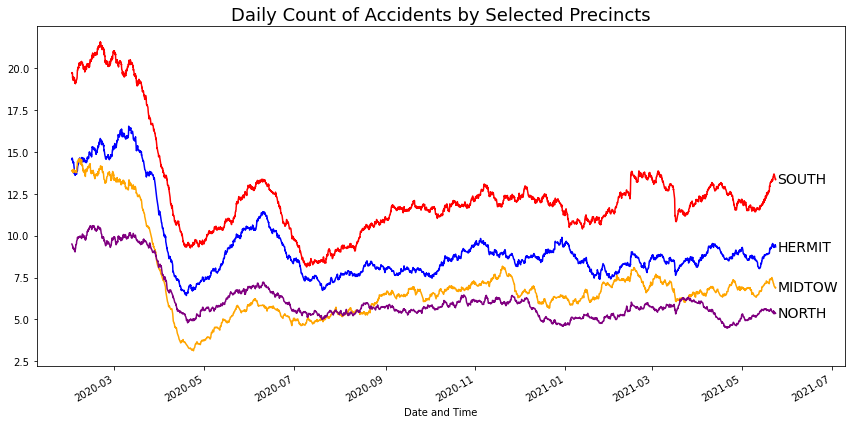

In [15]:
plt.figure(figsize = (12, 6))

for precinct, color in zip(['SOUTH', 'HERMIT', 'MIDTOW', 'NORTH'], ['red', 'blue', 'orange', 'purple']):
    traffic_by_precinct[(traffic_by_precinct.index > '02-01-2020') & (traffic_by_precinct.Precinct == precinct)]['rolling_daily_average'].plot(label = precinct, color = color)

    plt.annotate(text = precinct,
                 xy = ('2021-05-25', traffic_by_precinct[traffic_by_precinct.Precinct == precinct]['rolling_daily_average'].tolist()[-1]),
                va = 'center', ha = 'left', fontsize = 14)
        
xmin, xmax = plt.xlim()
plt.xlim(xmin, '2021-07-10')

plt.title('Daily Count of Accidents by Selected Precincts', fontsize = 18)
plt.tight_layout()
plt.savefig('../images/crashes/dc_crashes03.png', dpi = 150);